In [27]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from scipy.interpolate import interp1d
from scipy.optimize import minimize
sys.path.append('documents/BNL/jupyter/notebooks/calibrator')
os.environ['LUSEE_DRIVE_DIR']='/home/anze/work/lusee/Drive/'
from algorithms import  Comb, Calibrator
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
Asfix=np.load('Asfix.npy')
Ns=np.load('Ns.npy')
kar = np.load('kar.npy')

In [45]:
np.random.seed(122)
comb=Comb(kar,response=Asfix, noise=Ns)
C = Calibrator(comb, alpha=+0.3, dalpha_dt = 0.0002, add_noise=True, export='bethe', sA=2.0, sc=2, ssig=1.3)
C.analyze_data(alpha_start=+0.0,tmax=6)
C.cross_correlate()
res = C.results

#comb=Comb(kar,response=2*Asfix, noise=Ns)
#C = Calibrator(comb, alpha=-0.3, add_noise=True)
#C.analyze_data(alpha_start=+0.3,tmax=60)
#C.cross_correlate()
#res2 = C.results



t= res['t']

Non zero weights 243
ADA: (0.001742792670714283-0.0005888170806555554j)
ADA: (-0.009521805800058321-0.008294413093615552j)
ADA: (0.008367006031271051+0.0070131875213744164j)
ADA: (-0.005518417689886768+0.000238983764138785j)
ADA: (0.004818182232219826-0.0013157676037039373j)
ADA: (-0.00466667738772452+0.007929083113102649j)
ADA: (0.0029800317290827453-0.016715452849684263j)
ADA: (-0.0006185053513770987-0.0019081050787433927j)
PROD 0j (-6.185053513770987e-10+1.9081050787433926e-09j)
FDSD 0.0 0.0
And now: (-6.185053513770987e-10-1.9081050787433926e-09j) (1-0j) (-6.185053513770987e-10-1.9081050787433926e-09j)
ADA: (-0.00569271624112123-0.007082847479971853j)
PROD (-6.185053513770987e-10-1.9081050787433926e-09j) (-5.69271624112123e-09+7.082847479971853e-09j)
FDSD 1.1267295590447025e-10 -6.982486638845002e-08
And now: (-5.735615641986963e-09-9.088233603044863e-09j) (0.957649669707655+0.28793594792734617j) (-5.69271624112123e-09-7.082847479971853e-09j)
ADA: (0.004044244729630579+0.0056997671

In [46]:
res['SNR2']

array([ 0.74552797,  1.01454573,  1.32095251,  2.64106676,  4.75935562,
        6.34063215,  7.61549665, 11.13680317, 12.68294282, 14.09015138,
       14.88080591, 14.10080725, 15.81535176, 14.44633848, 13.15706983,
       13.08552781, 11.663349  ,  9.8605384 ,  8.30693486,  6.10049227,
        4.86113991,  4.76983584,  3.79921045,  3.0560029 ,  2.50200609,
        2.02737353,  1.61755992,  1.32917624,  0.95453897,  1.36159976,
        1.00865608,  0.91110705,  0.96875269,  1.08199446,  0.91650454,
        1.06346803,  1.03417784])

In [47]:

res['stage3_Nacc']

array([8, 8, 3])

In [53]:
res['stage3'][:,0]

array([ 6.46496089e-09-1.73598128e-08j,  6.87785670e-11-1.06092448e-08j,
       -1.70465221e-08-1.73380875e-08j])

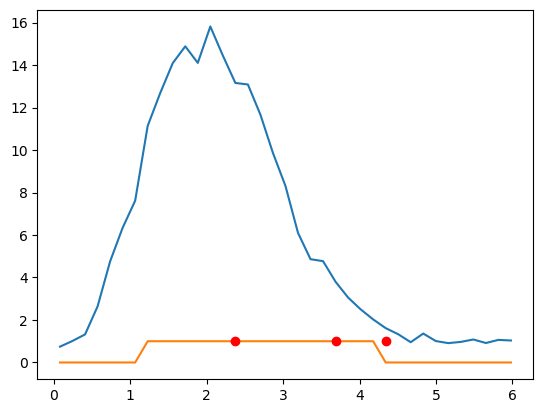

In [48]:
plt.plot (t, res['SNR2'])
#plt.plot (t, res2['SNR2'])

plt.plot (t, res['detect3'])
plt.plot(res['stage3_time'],np.ones(len(res['stage3_time'])),'ro')


Text(0, 0.5, 'clock drift [ppm]')

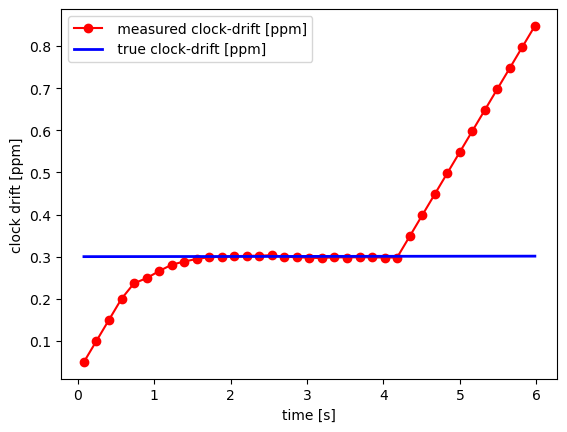

In [49]:
#plt.figure(figsize=(20,10))
t = res['t']
#plt.plot(t,res['detect']>0)
#plt.plot(t,res['detect3'])
plt.plot(t,res['alphadet'],'ro-', label=' measured clock-drift [ppm]')
plt.plot(t,-res['alpha'],'b-',lw=2, label=' true clock-drift [ppm]')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('clock drift [ppm]')
#plt.xlim(250,500)

Text(0, 0.5, 'response')

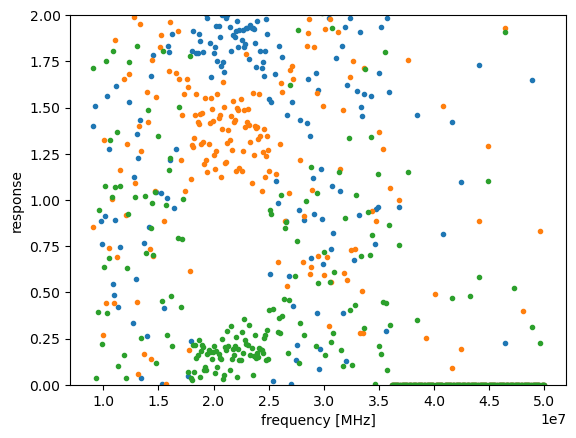

In [50]:
sp = res['stage3_phased']
sp[np.isnan(sp)]=0

plt.plot(C.comb.fcomb,np.real(res['stage3_phased'].T),'.')
#plt.plot(C.comb.fcomb, np.imag(res['stage3_phased'].T),'.')
plt.ylim(0,2)
plt.xlabel('frequency [MHz]')
plt.ylabel('response')

Text(0, 0.5, 'response')

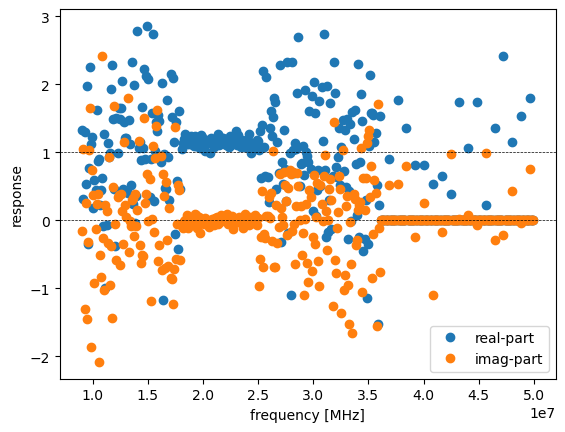

In [51]:
avg = res['stage3_phased'].mean(axis=0)
plt.plot(C.comb.fcomb, np.real(avg),'o', label='real-part')
plt.plot(C.comb.fcomb, np.imag(avg),'o', label='imag-part')
plt.axhline(1, color='black', lw=0.5, ls='--')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.xlabel('frequency [MHz]')
plt.ylabel('response')
#plt.ylim(-0.2,1.25)

In [9]:
res['stage3_time']

array([3.1539 , 4.46462, 4.87422])

In [10]:
res['stage3_phased'].shape

(3, 410)

In [54]:
ml = np.loadtxt('meta.dat')

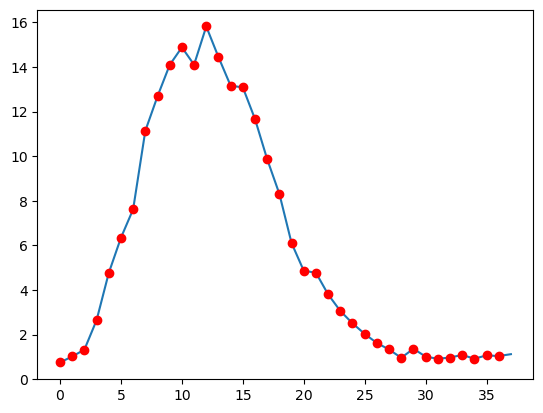

In [61]:
plt.plot (ml[:,1])
plt.plot(res['SNR2'],'ro')

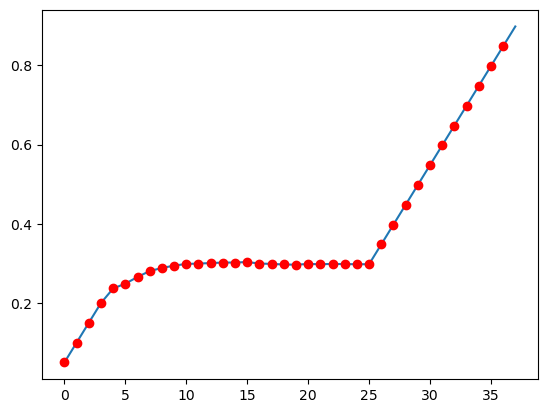

In [62]:
plt.plot (ml[:,0])
plt.plot(res['alphadet'],'ro')

In [73]:
a=np.loadtxt('output.dat')
ar = a[:,1::2]
ai = a[:,2::2]
ac = ar+1j*ai
w = np.where(ar[0,:]!=0)

(0.99, 1.01)

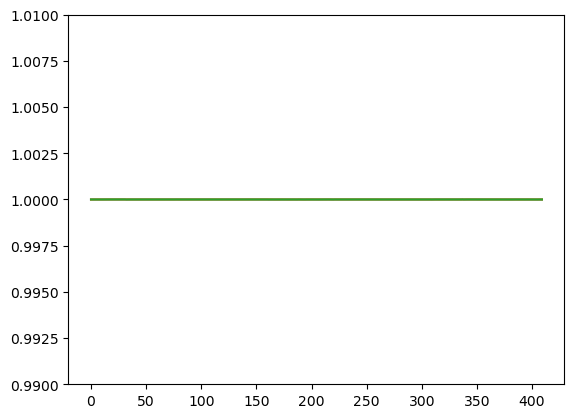

In [89]:
#plt.plot(ar[0,w[0]])
plt.plot(ac[0,w[0]]/res['stage3'][0,:]/1e5)
plt.plot(ac[1,w[0]]/res['stage3'][1,:]/1e5)
plt.plot(ac[2,w[0]]/res['stage3'][2,:]/1e5)



array([ 6.46496089e-09-1.73598128e-08j, -5.81401471e-09+3.43741304e-08j,
       -2.22945056e-08-5.69075670e-09j, -1.06579379e-08-6.07849283e-08j,
       -4.46741262e-08+2.50927625e-08j, -2.65742942e-08+2.60206733e-08j,
       -4.77188390e-08-1.32104040e-08j, -2.08168883e-08+1.20853565e-08j,
        4.25260487e-08-3.86180569e-08j, -4.96115638e-08+5.05994123e-08j,
       -3.16297617e-08-1.59035685e-08j,  1.22790972e-08+1.15393835e-09j,
        2.23723105e-08-4.68794712e-09j, -1.50845237e-08+1.87388351e-08j,
       -2.21773745e-08+5.31147527e-08j, -3.33528582e-08+5.05958588e-08j,
       -1.00445224e-09+1.66532656e-08j,  1.48817926e-08+1.41063691e-09j,
        6.43289064e-08-3.64392589e-08j, -1.40692562e-08-2.35079257e-08j,
        3.05021056e-10+3.19947982e-08j,  9.31964995e-09-3.09619468e-08j,
        2.50368318e-08+2.18263523e-08j,  3.55220198e-09-6.21729028e-09j,
        5.79392527e-09-6.57477550e-09j,  1.93076621e-08+5.42537168e-08j,
       -1.04788463e-08-6.26974803e-08j, -6.32383700

In [ ]:

res['stage3_Nacc']

array([8, 8, 3])